In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import our dataset
df = pd.read_csv("C:/Users/eocon/Desktop/predictive_maintenance_dataset.csv")

# confirm import
display(df.head())
print(f'Original shape of dataframe: {df.shape}\n')

## DATA CLEANING
# convert date column to datetime data
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
print(df.dtypes)

# metric8 is a duplicate of metric7
df = df.drop('metric8', axis=1)
print(f'\nNew dataframe of shape: {df.shape}')
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


Original shape of dataframe: (124494, 12)

date       datetime64[ns]
device             object
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
dtype: object

New dataframe of shape: (124494, 11)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [48]:
# there are many different devices/machines in our dataset
print(f"device column has {len(df['device'].unique())} unique values")

# the first four letter seem to denote device "family" or type
df['model'] = df['device'].apply(lambda x: x[:4])
display(df.head())
print(df['model'].value_counts())

device column has 1169 unique values


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,model
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,S1F0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,S1F0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,S1F0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,S1F0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,S1F0


S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: model, dtype: int64


In [50]:
# since we have the most data points for the "S1F0" family of parts, we will perform our predictive maintenance for this type of machine only
df = df[df['model']=='S1F0']
df = df.drop(columns=['device'])
print(f'Our new dataframe with only S1F0 values is of shape {df.shape}')

Our new dataframe with only S1F0 values is of shape (33169, 11)


Descriptive statistics for each column:


,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
count,33169.000000,3.316900e+04,33169.000000,33169.000000,33169.000000,33169.000000,33169.000000,33169.000000,33169.000000
mean,0.001085,1.225312e+08,190.065573,31.681962,1.871567,14.905183,271169.711839,0.394947,29.918207
std,0.032927,7.036043e+07,2710.004262,357.829802,21.335861,18.308456,63260.510355,6.228257,265.189617
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,25.000000,0.000000,0.000000
25%,0.000000,6.177268e+07,0.000000,0.000000,0.000000,8.000000,233813.000000,0.000000,0.000000
50%,0.000000,1.231691e+08,0.000000,0.000000,0.000000,10.000000,263727.000000,0.000000,0.000000
75%,0.000000,1.833091e+08,0.000000,0.000000,0.000000,12.000000,291418.000000,0.000000,1.000000
max,1.000000,2.441405e+08,64792.000000,24929.000000,1074.000000,95.000000,689161.000000,424.000000,10137.000000


Number of failures: 36
Number of non-failures: 33133


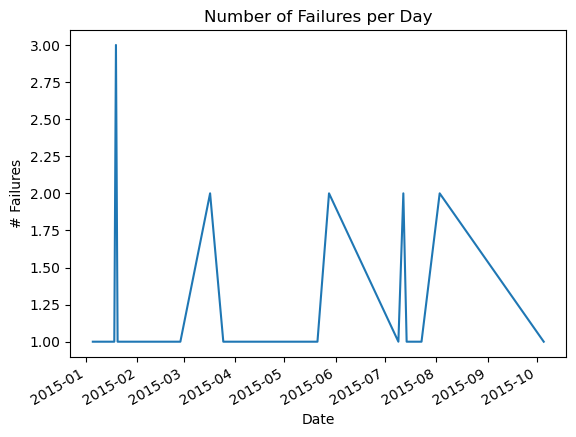

In [52]:
## EXPLORATORY ANALYSIS
# investigate statistics for each column
print('Descriptive statistics for each column:')
display(df.describe())

# count the number of failures vs non-failures
df_fail = df[df['failure']==1]
df_nf = df[df['failure']==0]
print(f'Number of failures: {df_fail.shape[0]}\nNumber of non-failures: {df_nf.shape[0]}')

# show number of failures over time
fails_per_day = df_fail.groupby('date').size()
fails_per_day.plot(kind='line')
plt.title('Number of Failures per Day')
plt.xlabel('Date')
plt.ylabel('# Failures')
plt.show()

In [ ]:
## DATA BALANCING: our # failures is tiny compared to # non-failures
# employ SMOTE!
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=25)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=['date', 'model', 'failure'], axis=1), df['failure'])

# organize into new df
balanced_df = pd.DataFrame(X_resampled)
balanced_df['failure'] = y_resampled
display(balanced_df)

# check balance
df_fail = balanced_df[balanced_df['failure']==1]
df_nf = balanced_df[balanced_df['failure']==0]
print(f'Number of failures: {df_fail.shape[0]}\nNumber of non-failures: {df_nf.shape[0]}')  # it is now balanced!

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,failure
0,215630672,55,0,52,6,407438,0,7,0
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,3,0
...,...,...,...,...,...,...,...,...,...
66261,136690494,861,0,0,29,272781,0,0,1
66262,220837033,12,0,0,12,271251,4,0,1
66263,151283594,0,0,21,80,249289,8,0,1
66264,129922417,140,0,12,47,260562,0,0,1


Number of failures: 33133
Number of non-failures: 33133


In [ ]:
# test/train split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 80-20 split with metrics 1-9 as predictors, failure as response
X_train, X_test, y_train, y_test = train_test_split(balanced_df.drop(columns=['failure'], axis=1), balanced_df['failure'], test_size = 0.2, random_state=25)

# confirm shapes of training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# standardize predictors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

(53012, 8) (53012,)
(13254, 8) (13254,)


In [70]:
## FITTING MODELS
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define df where we will organize results
results_df = pd.DataFrame(columns=['method', 'accuracy', 'precision', 'recall', 'f1'])

# define function to evaluate model performance
def get_metrics(predictions):
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return acc, prec, recall, f1


In [72]:
# fit support vector machine
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
acc, prec, recall, f1 = get_metrics(svc_predictions)
new_row = {'method': 'SVC', 'accuracy': acc, 'precision': prec, 'recall': recall, 'f1': f1}
results_df.loc[0] = new_row

In [88]:
# fit random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
acc, prec, recall, f1 = get_metrics(rf_predictions)
new_row = {'method': 'Random Forest', 'accuracy': acc, 'precision': prec, 'recall': recall, 'f1': f1}
results_df.loc[1] = new_row

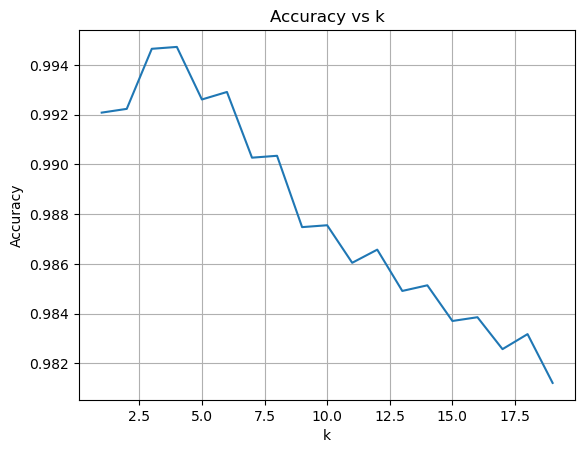

Optimal value of n is:  4


In [91]:
# determine an optimal value of k and fit k nearest neighbors
n_values = range(1, 20)
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    acc, prec, recall, f1 = get_metrics(knn_predictions)
    accuracies.append(acc)

# Plot
plt.plot(n_values, accuracies)
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# output best n
best_n = accuracies.index(max(accuracies)) + 1
print('Optimal value of n is: ', best_n)

In [89]:
# fit knn with best n
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
acc, prec, recall, f1 = get_metrics(knn_predictions)
new_row = {'method': 'K Neighbors', 'accuracy': acc, 'precision': prec, 'recall': recall, 'f1': f1}
results_df.loc[2] = new_row

In [ ]:
# display final results
display(results_df)  # k neighbors is best!

,method,accuracy,precision,recall,f1
0,SVC,0.916855,0.962264,0.865464,0.911301
1,Random Forest,0.921080,0.867952,0.990827,0.925328
2,K Neighbors,0.994719,0.990153,0.999236,0.994674
